#***Laptop Price Prediction***

##**Introduction**
####Q1.Why are we working on this project?

* SmartTech Co. wants to predict laptop prices based on specifications like RAM, CPU, storage, company etc.
* A model like this helps in:-

*  Competitive pricing

* Understanding which features increase laptop cost

* Real-time pricing for new laptops

* Market insights for branding

####Q2.What are the Challenges in Reallife senario ??
* Diverse specifications :
Laptops vary widely by RAM, storage, GPU, CPU, resolution, weight etc
* Noisy/missing data :
Real datasets contain missing values, inconsistent formats, or incorrect entries. Requires cleaning, preprocessing, and handling of null values
* Brand influence	:    Brand reputation affects price significantly. Hard to quantify because brand is non-numeric. Requires encoding and careful handling.
* Need for interpretability :	Companies need to understand why a price is predicted. Models must provide feature importance and clear explanations. Black-box models are harder to justify.

####Q3.Explanation of variables
* Company – Laptop brand

* ScreenSize – Display size

* Cpu – CPU name

* Ram – RAM capacity

* Gpu – Graphics processor

* OpSys – Operating system

* Weight – Laptop weight

* Resolution – Screen resolution

* Storage – SSD/HDD size

* Price – Target variable





##**Method**

###Basic exploration

In [1]:
#Load the dataset
import pandas as pd
df=pd.read_csv('laptop.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


* Returns first 5 rows

In [2]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


* Returns bottom 5 rows

In [3]:
#Shape of the data
df.shape

(1303, 13)

* Shows total rows & columns

* Helps identify dataset size (large/small)

In [4]:
#To explore column names
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [5]:
#Datatypes
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


* Text columns need encoding

* Helps you detect incorrect formats (eg .RAM stored as object “8GB”)

In [6]:
#Missing values
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


* It helps to idetify where cleaning is needed


In [7]:
#Summary of numeric columns
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


* Shows outliers (from extreme min/max)
* Shows mean, median → helps choose imputation methods

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


* The dataset has 1303 rows with many string-type columns, some missing values, and extra unwanted index columns that need cleaning.

##**Data Cleaning**

####1. Handling missing values

In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)

Fills numeric columns with their median, which is safe because it avoids bias from extreme values.

In [10]:
df.fillna(df.mode().iloc[0], inplace=True)


Fills categorical (object) columns with their most frequent value (mode

In [11]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


####2. Cleaning RAM -> remove “GB” and convert to int

In [12]:
df['Ram'] = df['Ram'].astype(str).str.extract(r'(\d+)').astype(int)
df['Ram']








,Ram
0,8
1,8
2,8
3,16
4,8
...,...
1298,4
1299,16
1300,2
1301,6



* Converted all RAM entries to strings, extracted only the numeric part, and converted it to integers so the model can use it properly.

####3. Clean Weight remove “kg”

In [13]:
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '')
df['Weight'] = df['Weight'].replace('?', None)
df['Weight'] = df['Weight'].astype(float)
df['Weight'] = df['Weight'].fillna(df['Weight'].median())
df['Weight']




,Weight
0,1.37
1,1.34
2,1.86
3,1.83
4,1.37
...,...
1298,1.80
1299,1.30
1300,1.50
1301,2.19


* The code removes "kg", converts "?" to missing values, and turns the Weight column into floats.

* Then it fills all missing values with the median weight of the column.

####4. Clean Storage column (convert TB → GB)

In [14]:
def convert_storage(x):
    parts = x.replace('+', ' ').split()   # handle "SSD + 1TB HDD"
    total = 0
    for part in parts:
        if 'GB' in part:
            total += int(part.replace('GB',''))
        elif 'TB' in part:
            total += int(float(part.replace('TB','')) * 1024)
    return total

df['Storage_GB'] = df['Memory'].apply(convert_storage)

df.drop(columns=['Memory'], inplace=True)


* Converts TB → GB

* Combines multiple drives (SSD + HDD)

* Represents full storage capacity numerically

####5. Clean ScreenResolution

In [15]:
# Extract width and height as separate columns using regex
df[['Res_Width', 'Res_Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')

# Convert to integers
df['Res_Width'] = df['Res_Width'].astype(int)
df['Res_Height'] = df['Res_Height'].astype(int)
df.drop(columns=['ScreenResolution'], inplace=True)



* It turns messy, inconsistent text into structured numeric data, which is necessary for analysis, visualization, or further calculations.


####6. Converted Inches column to Numeric

In [16]:
df['Inches'] = df['Inches'].astype(str).str.replace('"', '')
df['Inches'] = df['Inches'].replace('?', None)
df['Inches'] = df['Inches'].astype(float)
df['Inches'] = df['Inches'].fillna(df['Inches'].median())
df['Inches']


,Inches
0,13.3
1,13.3
2,15.6
3,15.4
4,13.3
...,...
1298,14.0
1299,13.3
1300,14.0
1301,15.6


* Removed unwanted characters
* Handle invalid entries (?) and converted to float handled missing values

####7. Extract CPU Brand

In [17]:
df['Cpu_brand'] = df['Cpu'].str.split().str[0]
df.drop(columns=['Cpu'], inplace=True)

####8. Extract GPU Brand

In [18]:
df['Gpu_brand'] = df['Gpu'].str.split().str[0]
df.drop(columns=['Gpu'], inplace=True)


* If you don’t extract Cpu_brand or Gpu_brand, the model sees the full CPU/GPU strings with many unique values.

* This makes the features too complex and harder for the model to learn patterns.

* Extracting the brand reduces complexity and keeps only meaningful info like Intel, AMD, Nvidia.

* Without it, your predictions may be less accurate and harder to interpret.

In [19]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Storage_GB,Res_Width,Res_Height,Cpu_brand,Gpu_brand
0,0,0.0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,128,2560,1600,Intel,Intel
1,1,1.0,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,128,1440,900,Intel,Intel
2,2,2.0,HP,Notebook,15.6,8,No OS,1.86,30636.0000,256,1920,1080,Intel,Intel
3,3,3.0,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,512,2880,1800,Intel,AMD
4,4,4.0,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,256,2560,1600,Intel,Intel


####7. Removing Duplicates


In [20]:
df.drop_duplicates(inplace=True)


In [21]:
df.shape

(1303, 14)

##**Data Manipulation**

####1. Filtering Rows



In [22]:
df = df[df['OpSys'] != 'Chrome OS']

* Chrome OS laptops are usually much cheaper than Windows or macOS laptops.

* If you keep them in your dataset, the model might learn wrong patterns, e.g., associating low prices with features that don’t really lower price.

* This can bias predictions for other laptops, because the model is “confused” by the very low prices of Chrome OS devices.

####2. Creating New Column
* PPI (Pixel Per Inch)


In [23]:
df['PPI'] = ((df['Res_Width']**2 + df['Res_Height']**2)**0.5) / df['Inches']
df.drop(columns=['Res_Width', 'Res_Height'], inplace=True)


* Calculated PPI (Pixels Per Inch) : combined Res_Width, Res_Height, and Inches to get a single measure of screen sharpness, which is more meaningful for analysis than separate width and height.

* Dropped Res_Width and Res_Height : after computing PPI, these
columns became redundant, so you removed them to clean the dataset and reduce clutter.

####3.Sorting values

In [24]:
df.sort_values('Price', ascending=False).head()


,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Storage_GB,Cpu_brand,Gpu_brand,PPI
196,196,196.0,Razer,Gaming,17.3,32,Windows 10,3.49,324954.72,1024,Intel,Nvidia,254.671349
830,830,830.0,Razer,Gaming,17.3,32,Windows 10,3.49,292986.72,512,Intel,Nvidia,254.671349
610,610,610.0,Lenovo,Notebook,15.6,32,Windows 10,2.50,261018.72,1024,Intel,Nvidia,282.423996
749,749,749.0,HP,Workstation,17.3,16,Windows 7,3.00,233845.92,256,Intel,Nvidia,127.335675
1066,1066,1066.0,Asus,Gaming,17.3,64,Windows 10,3.58,211788.00,1024,Intel,Nvidia,127.335675


##**Data Preprocessing**

* Numeric Columns : ['Ram','Weight','Storage_GB','PPI','ScreenSize']

* Categorical Columns : ['Company','Cpu_brand','Gpu_brand','OpSys']

####1. Import Libraries

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


####2. Seperate Features and Target

In [26]:
X = df.drop('Price', axis=1)
y = df['Price']


####3. Label Encoding for Categorical Columns

In [27]:
#Categorical Columns
cat_cols = ['Company','TypeName','Cpu_brand','Gpu_brand','OpSys']


In [28]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Storage_GB,Cpu_brand,Gpu_brand,PPI
0,0,0.0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,128,Intel,Intel,226.983005
1,1,1.0,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,128,Intel,Intel,127.677940
2,2,2.0,HP,Notebook,15.6,8,No OS,1.86,30636.0000,256,Intel,Intel,141.211998
3,3,3.0,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,512,Intel,AMD,220.534624
4,4,4.0,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,256,Intel,Intel,226.983005


In [29]:
#Label encoder to each column
le_dict = {}      # to store encoders for later use

for col in cat_cols:
    le = LabelEncoder()        # create a new label encoder
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le


* LabelEncoder() converts text categories (like "Dell", "HP") into numbers because ML models cannot work with strings.

* The loop applies Label Encoding to each categorical column individually.

* X[col] = le.fit_transform(X[col]) replaces the text values with numeric labels.

* le_dict[col] = le stores each encoder so the same mapping is used later when predicting new dat

####4. Scale Numeric Features

In [30]:
numeric_cols = ['Ram','Weight','Storage_GB','PPI','Inches']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


* Numerical features have different scales (e.g., RAM=8, Storage=1000), which can confuse the model.

* Standardization converts all numeric values to a similar scale (mean=0, std=1).

* This prevents large-valued features from dominating the model and improves accuracy.

####5. Train-Test-Split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####6. Training and Prediction
* First we train the model on Training dataset
* Later on we predict the model on same training data to see Train error using GradientBoostingRegressor

In [32]:
GradientBoostingRegressor()
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [33]:

train_pred = gb.predict(X_train)
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

train_r2 = r2_score(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

print("Training R2  =", train_r2)
print("Training RMSE =", train_rmse)


Training R2  = 0.886293292543273
Training RMSE = 12330.025901985364



* **Interpretation:**

* The model explains 88.63% of the variation in laptop prices in the training data.

* This means your model is capturing the major patterns in the data very well.

* Only 11.37% of the variation remains unexplained (noise or unpredictable factors).


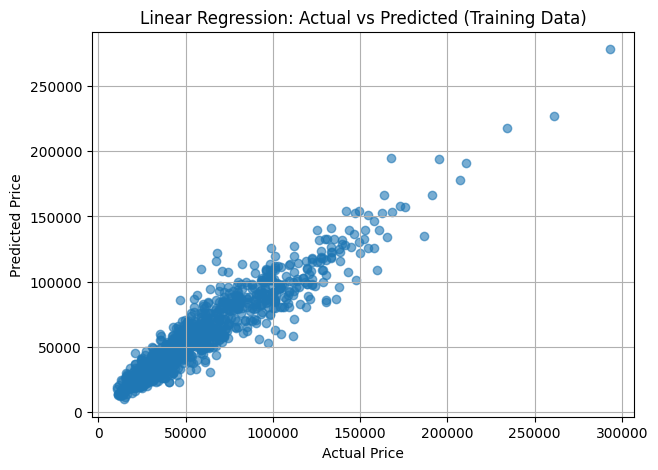

In [34]:
#Plot actual vs predicted (Training data)
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_train, train_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted (Training Data)")
plt.grid(True)
plt.show()


####7. Train and prediction on Test dataset using Different models


a.Linear regression

In [64]:
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [65]:
# Predict on test data
lr_test_pred = lr.predict(X_test)

# Metrics
lr_test_r2 = r2_score(y_test, lr_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))

print("Linear Regression - Test R2:", lr_test_r2)
print("Linear Regression - Test RMSE:", lr_test_rmse)

Linear Regression - Test R2: 0.6843791361335136
Linear Regression - Test RMSE: 21325.27253959744


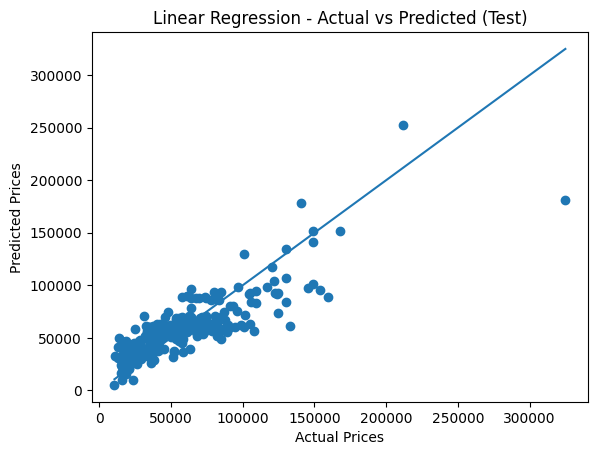

In [36]:
# Plot
plt.scatter(y_test, lr_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression - Actual vs Predicted (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

b. Desision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
dt_test_pred = dt.predict(X_test)

dt_test_r2 = r2_score(y_test, dt_test_pred)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))

print("Decision Tree - Test R2:", dt_test_r2)
print("Decision Tree - Test RMSE:", dt_test_rmse)


Decision Tree - Test R2: 0.6608451015254556
Decision Tree - Test RMSE: 22106.031530898734


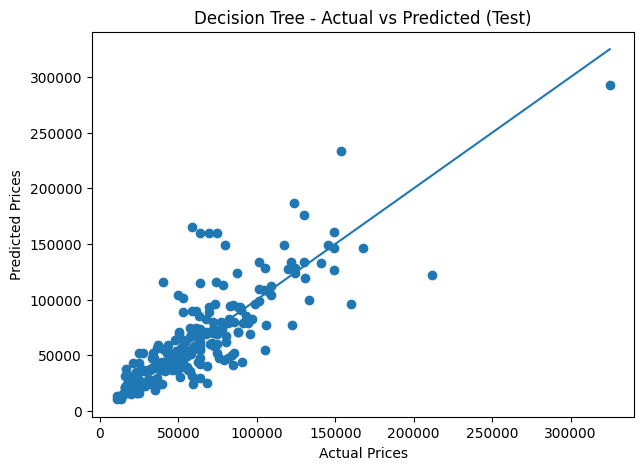

In [38]:
#plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, dt_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree - Actual vs Predicted (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

c. Random Forest

In [68]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [69]:
rf_test_pred = rf.predict(X_test)

rf_test_r2 = r2_score(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))

print("Random Forest - Test R2:", rf_test_r2)
print("Random Forest - Test RMSE:", rf_test_rmse)

Random Forest - Test R2: 0.7904058927997223
Random Forest - Test RMSE: 17378.059194059526


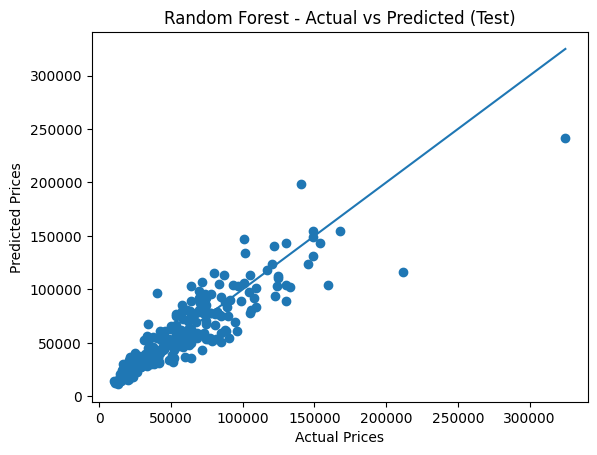

In [40]:
plt.scatter(y_test, rf_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest - Actual vs Predicted (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

d. Gradient Boosting

In [70]:
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)



GradientBoostingRegressor()

In [71]:
gb_test_pred = gb.predict(X_test)

gb_test_r2 = r2_score(y_test, gb_test_pred)
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))

print("Gradient Boosting - Test R2:", gb_test_r2)
print("Gradient Boosting - Test RMSE:", gb_test_rmse)

Gradient Boosting - Test R2: 0.8065150307010059
Gradient Boosting - Test RMSE: 16696.88110174927


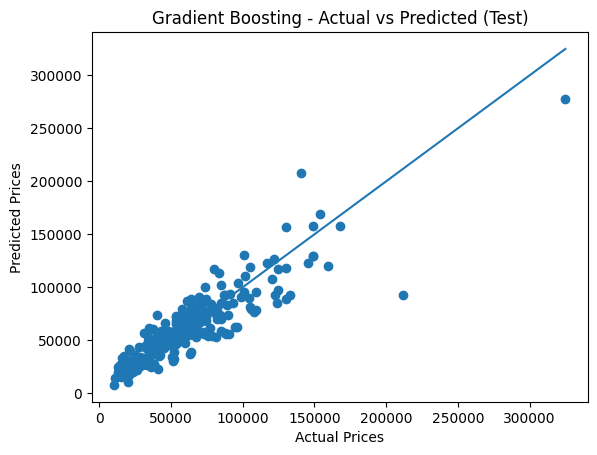

In [42]:
plt.scatter(y_test, gb_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting - Actual vs Predicted (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

e. XGBoost Model

In [73]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_test_pred = xgb.predict(X_test)

xgb_test_r2 = r2_score(y_test, xgb_test_pred)
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

print("XGBoost - Test R2:", xgb_test_r2)
print("XGBoost - Test RMSE:", xgb_test_rmse)

XGBoost - Test R2: 0.7747107346837383
XGBoost - Test RMSE: 18016.97962873347


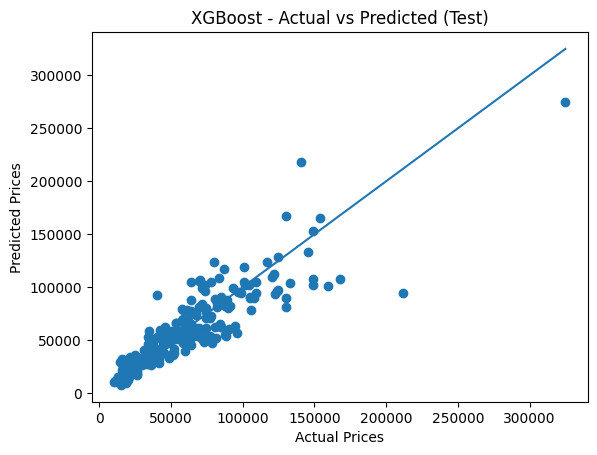

In [44]:
plt.scatter(y_test, xgb_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost - Actual vs Predicted (Test)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

###Compare Models

               Model        R2          RMSE
0  Linear Regression  0.684379  21325.272540
1      Decision Tree  0.636466  22886.742561
2      Random Forest  0.797256  17091.718851
3  Gradient Boosting  0.805731  16730.683285
4            XGBoost  0.774711  18016.979629


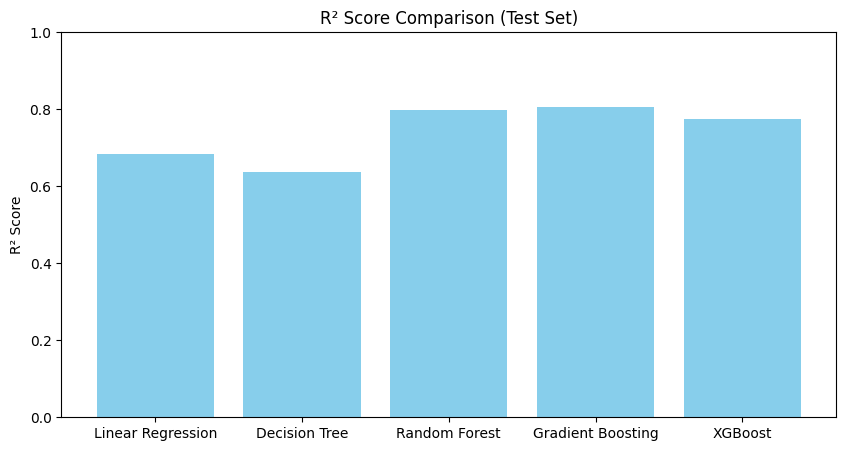

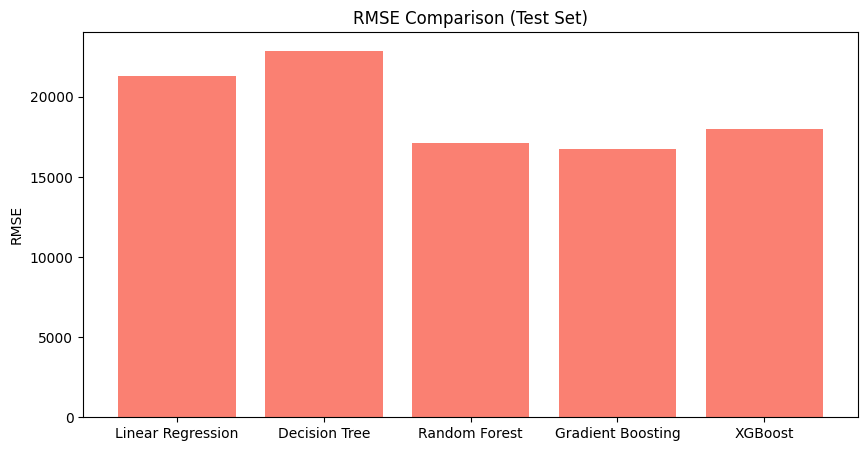

Best Model based on R²: Gradient Boosting
Best Model based on RMSE: Gradient Boosting


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a summary table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'R2': [lr_test_r2, dt_test_r2, rf_test_r2, gb_test_r2, xgb_test_r2],
    'RMSE': [lr_test_rmse, dt_test_rmse, rf_test_rmse, gb_test_rmse, xgb_test_rmse]
})

# Display the table
print(results)

# Plot R2 comparison
plt.figure(figsize=(10,5))
plt.bar(results['Model'], results['R2'], color='skyblue')
plt.ylabel("R² Score")
plt.title("R² Score Comparison (Test Set)")
plt.ylim(0, 1)
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10,5))
plt.bar(results['Model'], results['RMSE'], color='salmon')
plt.ylabel("RMSE")
plt.title("RMSE Comparison (Test Set)")
plt.show()

# Best model based on R²
best_model_r2 = results.loc[results['R2'].idxmax(), 'Model']
print("Best Model based on R²:", best_model_r2)

# Best model based on RMSE (lower is better)
best_model_rmse = results.loc[results['RMSE'].idxmin(), 'Model']
print("Best Model based on RMSE:", best_model_rmse)


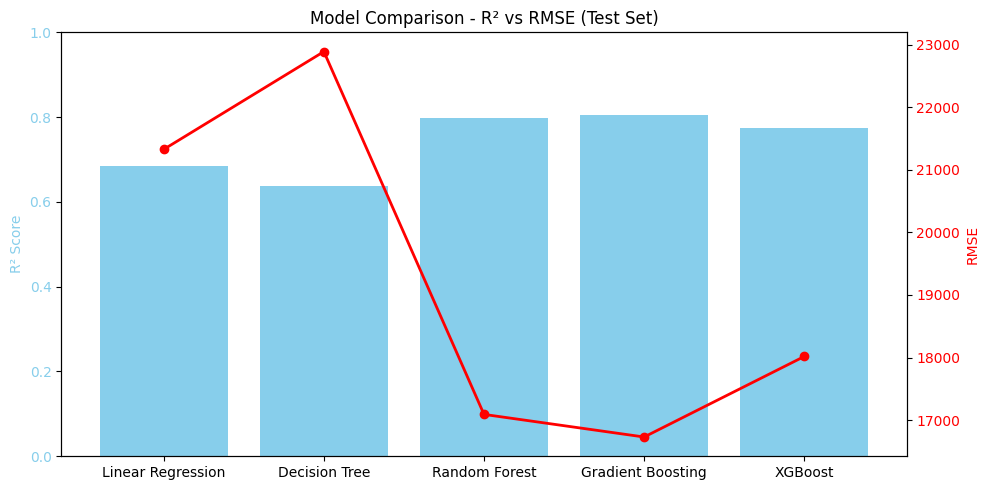

In [46]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,5))

# R2 bars (left y-axis)
ax1.bar(results['Model'], results['R2'], color='skyblue', label='R²')
ax1.set_ylabel('R² Score', color='skyblue')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create second y-axis for RMSE
ax2 = ax1.twinx()
ax2.plot(results['Model'], results['RMSE'], color='red', marker='o', linewidth=2, label='RMSE')
ax2.set_ylabel('RMSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
plt.title('Model Comparison - R² vs RMSE (Test Set)')
fig.tight_layout()
plt.show()


##**CONCLUSION**

####Best Model = **Gradient Boosting Regressor**
#####Reasons:

* Highest R² – explains the most variance in laptop prices.

* Lowest RMSE – smallest prediction errors on test data.

* Handles non-linear relationships – captures complex patterns between features and price.

* Works with mixed data types – numeric and categorical features.

####Key Factors influencing Laptop Prices
* CPU Brand: Apple > Intel > AMD

* GPU Brand: NVIDIA > AMD > Intel

* Storage Capacity (GB): More storage → higher price

* RAM (GB): More RAM → higher price

* Screen PPI: Higher PPI → higher price

* Company Reputation: Brand premium increases price (Apple, Dell, etc.)

* Weight: Lighter laptops tend to cost more

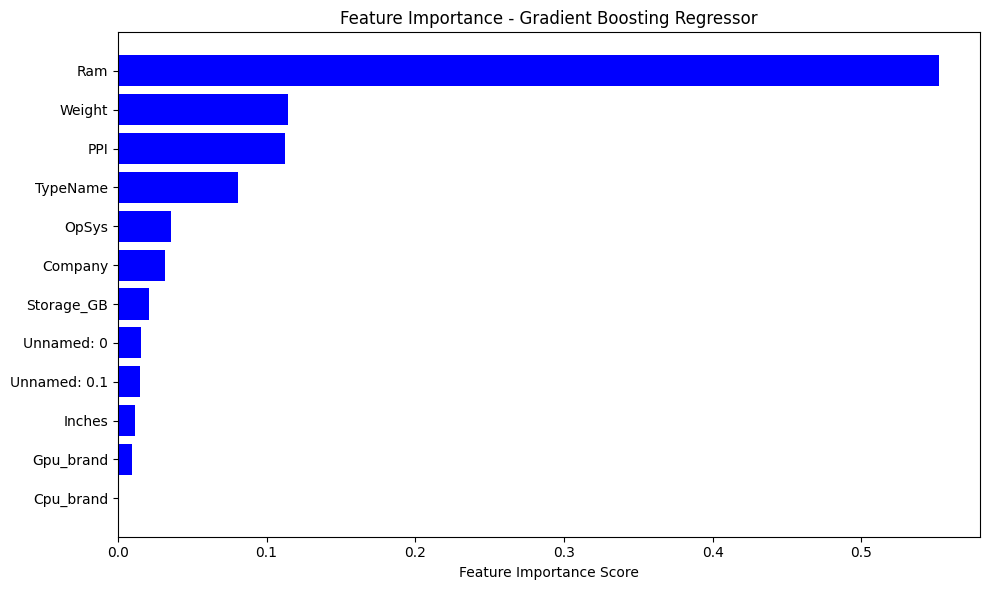

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from Gradient Boosting
importances = gb.feature_importances_
features = X_train.columns

# Sort features by importance (highest first)
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx], color='blue')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.tight_layout()
plt.show()


#####Price vs All Numeric features

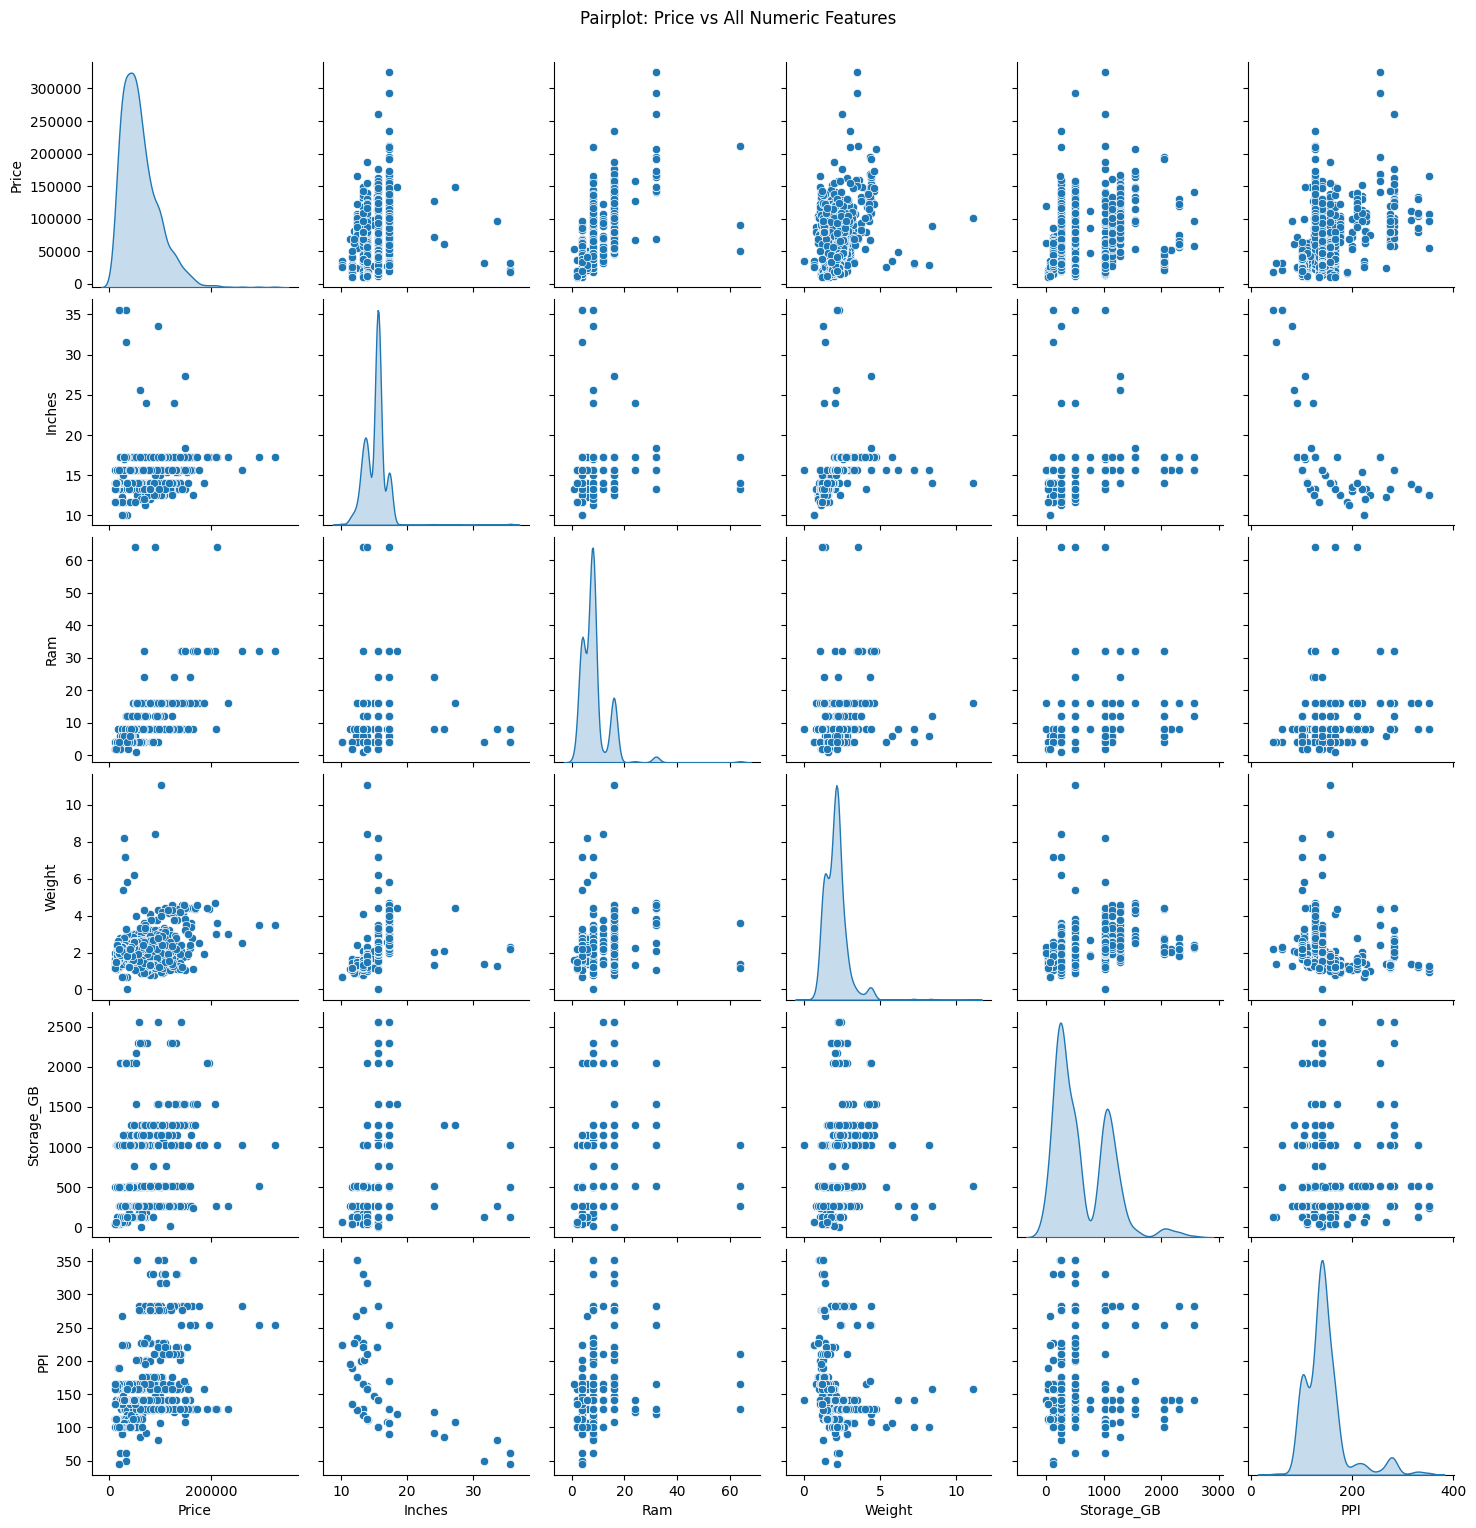

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns including Price
numeric_df = df[['Price', 'Inches', 'Ram', 'Weight', 'Storage_GB', 'PPI']]

# Pairplot
sns.pairplot(numeric_df, diag_kind='kde')
plt.suptitle("Pairplot: Price vs All Numeric Features", y=1.02)
plt.show()


####Real-World Insights for SmartTech Co.
* CPU	- Strongest influence on price
* GPU	- Gaming laptops have highest prices
* Storage - SSD increases price far more than HDD
* Brand	- Apple products priced highest
* Resolution - Higher resolution → expensive displays

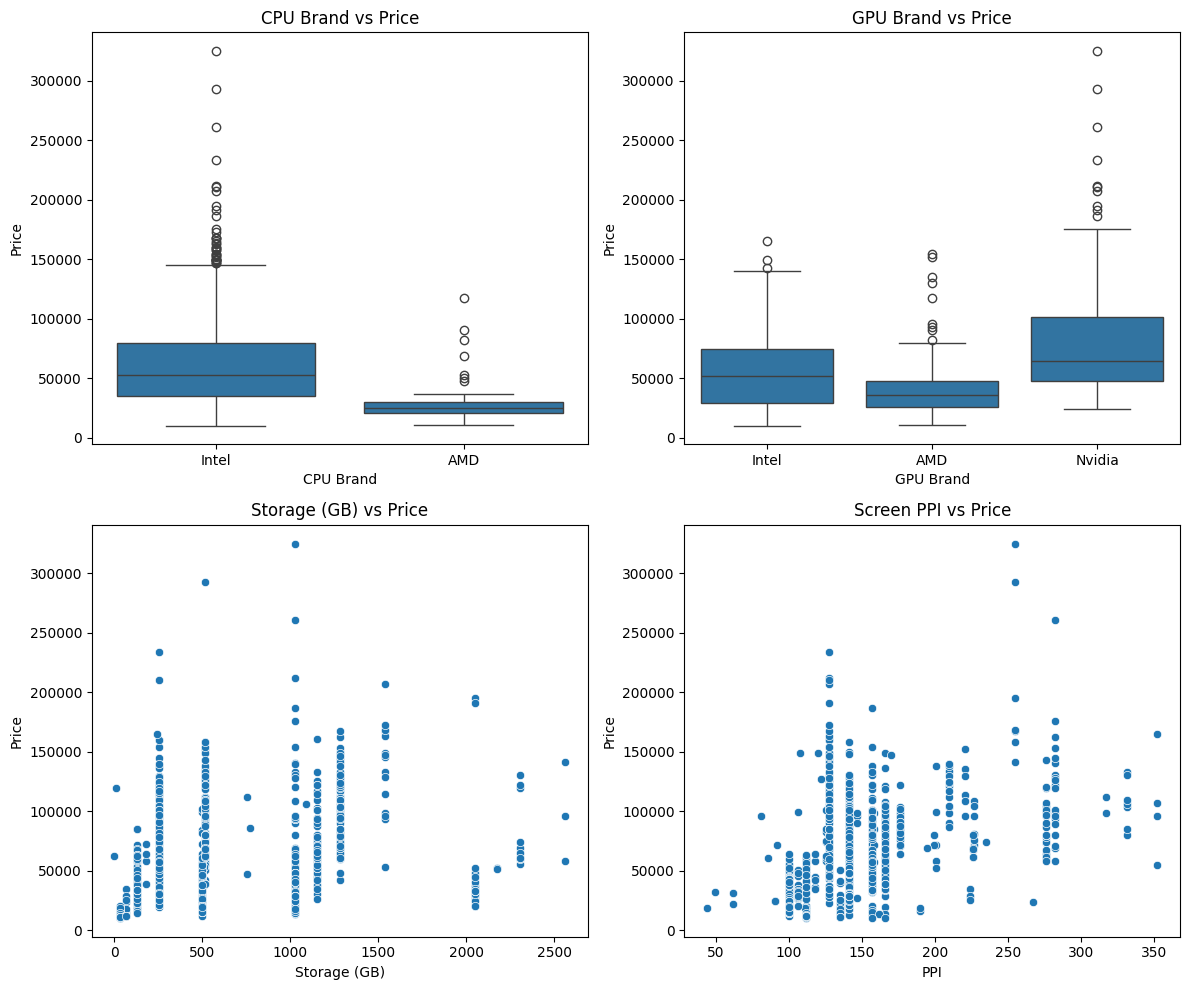

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# 1. CPU vs Price
plt.subplot(2, 2, 1)
sns.boxplot(x='Cpu_brand', y='Price', data=df)
plt.title("CPU Brand vs Price")
plt.xlabel("CPU Brand")
plt.ylabel("Price")

# 2. GPU vs Price
plt.subplot(2, 2, 2)
sns.boxplot(x='Gpu_brand', y='Price', data=df)
plt.title("GPU Brand vs Price")
plt.xlabel("GPU Brand")
plt.ylabel("Price")

# 3. Storage vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='Storage_GB', y='Price', data=df)
plt.title("Storage (GB) vs Price")
plt.xlabel("Storage (GB)")
plt.ylabel("Price")

# 4. PPI vs Price
plt.subplot(2, 2, 4)
sns.scatterplot(x='PPI', y='Price', data=df)
plt.title("Screen PPI vs Price")
plt.xlabel("PPI")
plt.ylabel("Price")

plt.tight_layout()
plt.show()



* Intel CPUs and NVIDIA GPUs are found in the highest-priced laptops, while AMD and Intel GPUs appear in cheaper ones.

* Larger SSD storage slightly increases price, but CPU/GPU matter much more.

* Higher screen PPI laptops (premium/Retina) are consistently more expensive.

* Overall, CPU brand, GPU brand, and screen quality are the strongest factors influencing laptop price.

####Limitations of the Model

* GPU VRAM size not included → may underestimate gaming laptops.

* Battery life missing → longer battery laptops may cost more.


* New CPUs/GPUs not in dataset → model extrapolates, may be less accurate

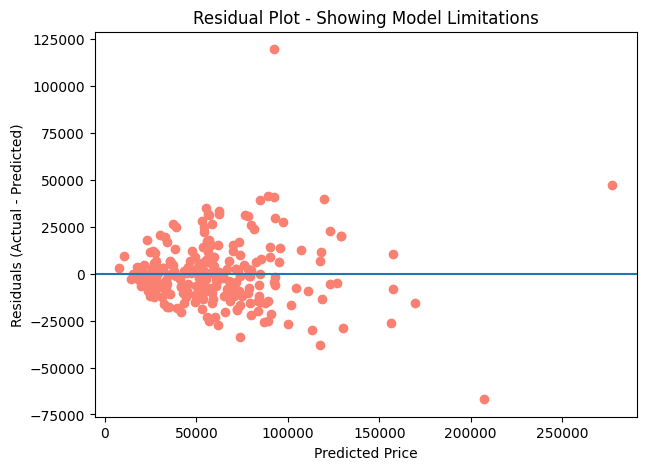

In [60]:
import matplotlib.pyplot as plt

# Residuals = Actual - Predicted (use your best model, e.g., gb)
y_pred = gb.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals,color="salmon")
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Showing Model Limitations")
plt.show()


####Supporting Real-Time Price Prediction

Using the saved preprocessing , the system can:

* Accept new laptop specifications.

* Automatically preprocess numeric and categorical features.

* Instantly predict laptop price in real-time.



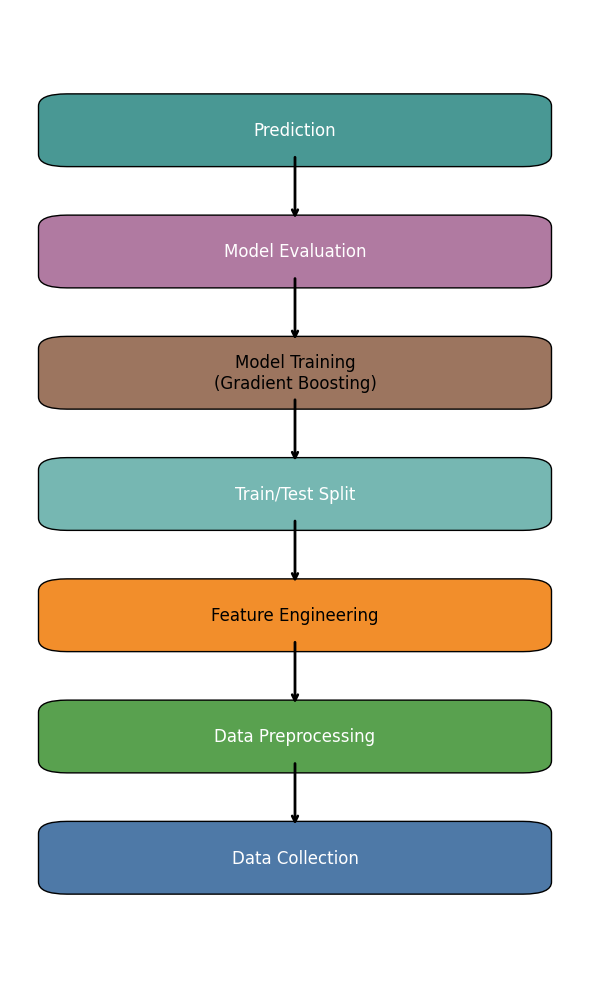

In [84]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Define steps
steps = [
    "Data Collection",
    "Data Preprocessing",
    "Feature Engineering",
    "Train/Test Split",
    "Model Training\n(Gradient Boosting)",
    "Model Evaluation",
    "Prediction"
]

# Modern tech-style colors
colors = [
    "#4E79A7",  # dark blue
    "#59A14F",  # green
    "#F28E2B",  # amber
    "#76B7B2",  # teal
    "#9C755F",  # brownish
    "#B07AA1",  # purple
    "#499894"   # turquoise
]

# Positions for vertical layout (bottom-to-top)
positions = list(range(len(steps)))  # bottom=0, top=6

fig, ax = plt.subplots(figsize=(6, 10))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, len(steps))
ax.axis('off')

# Draw boxes and arrows
for i, step in enumerate(steps):
    y = positions[i]
    # Draw box
    box = FancyBboxPatch((-0.8, y-0.2), 1.6, 0.4,
                         boxstyle="round,pad=0.1",
                         edgecolor='black', facecolor=colors[i])
    ax.add_patch(box)
    # Add text
    text_color = 'white' if i in [0, 1, 3, 5, 6] else 'black'
    ax.text(0, y, step, ha='center', va='center', fontsize=12, color=text_color)

    # Draw arrow pointing UP to next box
    if i < len(steps)-1:
        ax.annotate("", xy=(0, y+0.25), xytext=(0, y+0.8),
                    arrowprops=dict(arrowstyle="->", lw=2, color='black'))

plt.tight_layout()
plt.show()
